In [24]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt, cm as cm, mlab as mlab
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set()
from sklearn.mixture import GaussianMixture as GMM

In [2]:
# read csv/excel data files 
pnas_data1 = pd.read_csv('/home/jaeweon/research/data/pnas_data1.csv')
pnas_data2 = pd.read_csv('/home/jaeweon/research/data/pnas_data2.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
# format data 

# extract 9 Complexity Characteristic variables 
features = ['PolPop', 'PolTerr', 'CapPop', 'levels', 'government','infrastr', 'writing', 'texts', 'money']

# take subset of original data table with 9 CCs and change it into numpy array 
data_mat = pnas_data1.loc[:, features].values
scaled = StandardScaler().fit_transform(data_mat)
P, D, Q = svd(scaled)

In [10]:
def svd(data):
    """
    perform singular value decomposition on the given data matrix
    """
    #center the data
    mean = np.mean(data, axis=0)
    data -= mean
    
    P, D, Q = np.linalg.svd(data, full_matrices=False)
    
    return P, D, Q

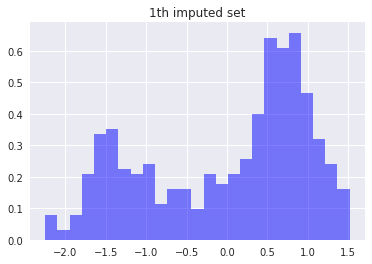

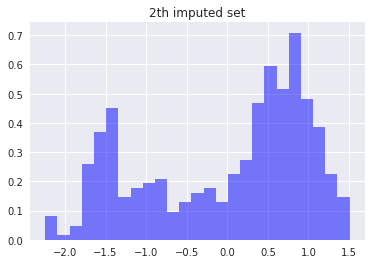

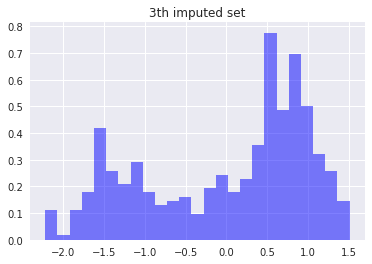

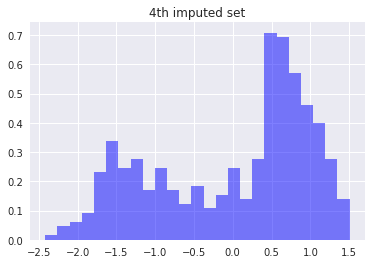

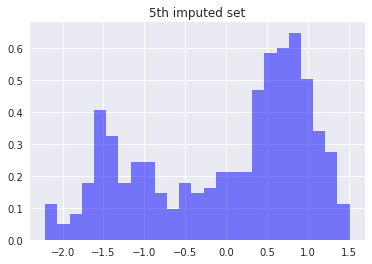

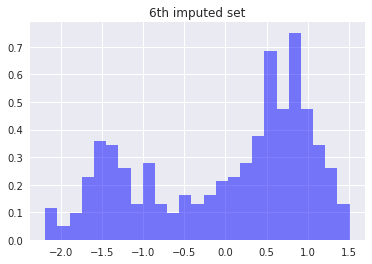

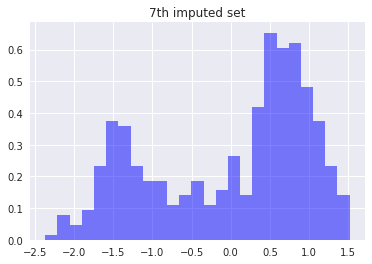

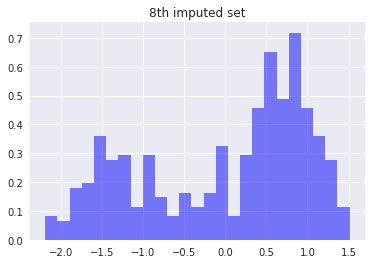

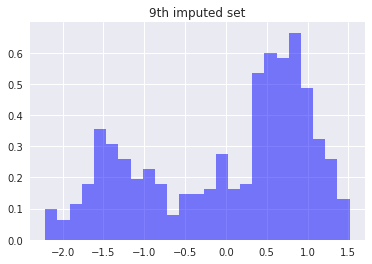

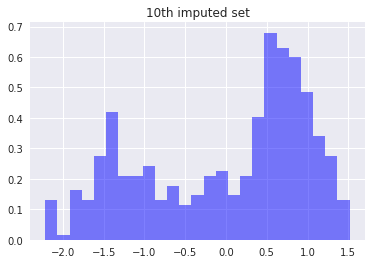

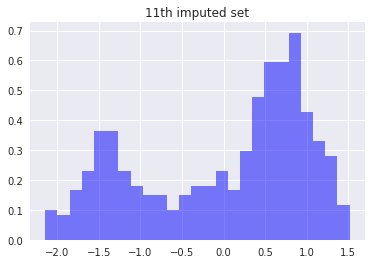

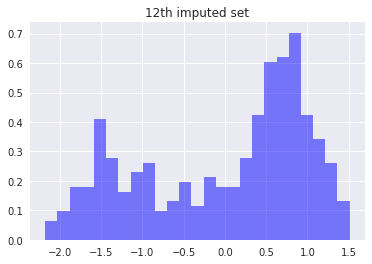

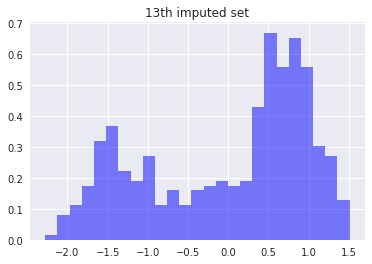

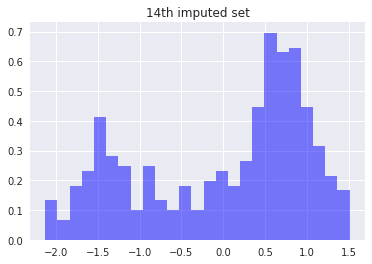

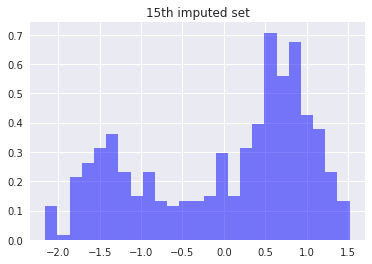

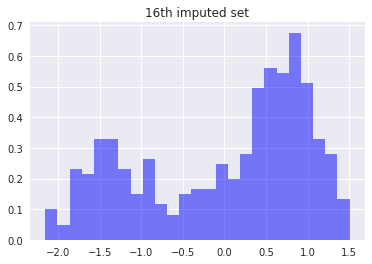

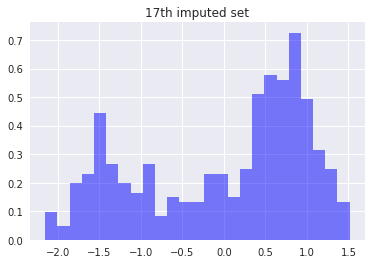

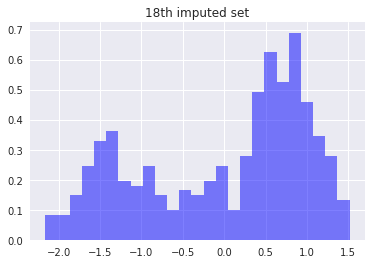

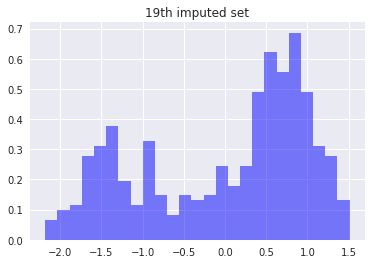

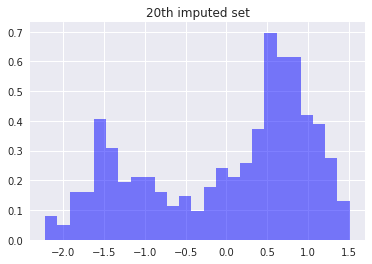

In [8]:
# histogram based on pca values for each of the imputed set
impute = ['V'+str(i) for i in range(1, 21)]

for i in range(len(impute)):
    data = StandardScaler().fit_transform(pnas_data2.loc[:, [impute[i]]].values)
    # filtered_pnas1 = pnas_data1.loc[:, features].values
    num_bins = 25

    # the histogram/gaussian mixture model of the data
    n, bins, patches = plt.hist(data, num_bins, normed=1, facecolor='blue', alpha=0.5)
    
    plt.title(str(i+1)+"th imputed set")
    plt.legend()
    plt.show()
    plt.close()

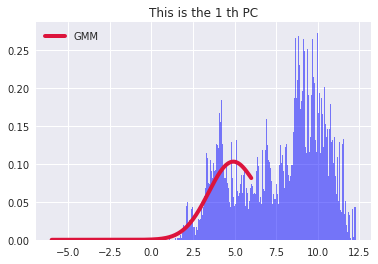

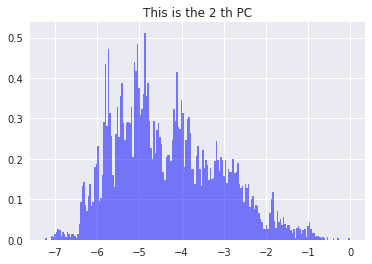

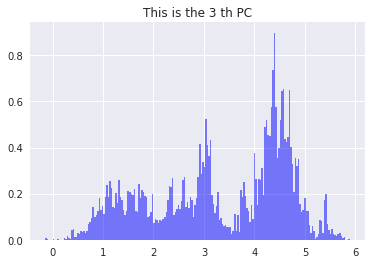

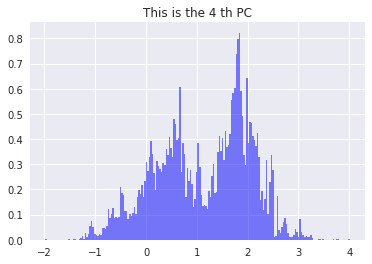

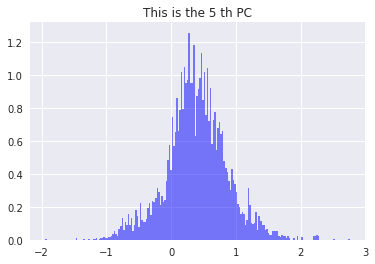

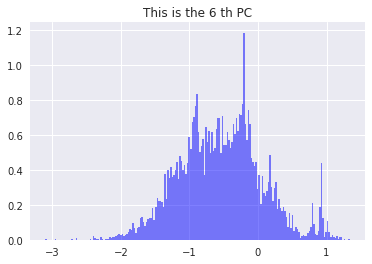

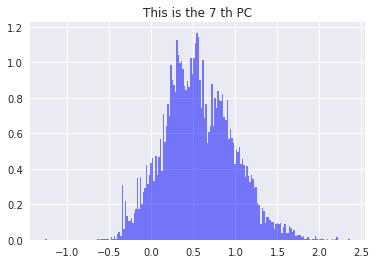

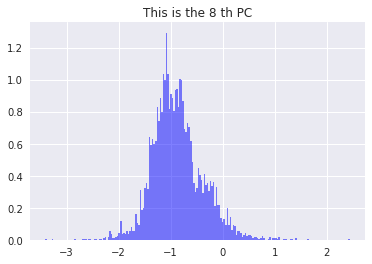

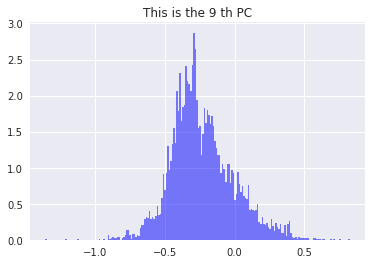

In [28]:
# histogram for 20 imputed sets combined 
data = np.matmul(data_mat, Q.T) # data matrix is obtained by multiplying initial data matrix with SVD column matrix
num_bins = 200
mu = 0 # mean (data is centered)

#fit GMM
gmm = GMM(n_components=2)
gmm = gmm.fit(X=np.expand_dims(data[:,0], 1))

# Evaluate GMM
gmm_x = np.linspace(-6, 6, 200)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))

# the histogram/gaussian mixture model of the data for each of the principal component
for i in range(9):
    if i == 0:
        fig, ax = plt.subplots()
        ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")

    n, bins, patches = plt.hist(data[:,i], num_bins, normed=1, facecolor='blue', alpha=0.5)

    plt.title('This is the %s th PC'% str(int(i)+1))
    plt.legend()
    plt.show()
    plt.close()

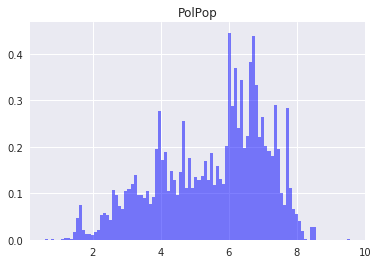

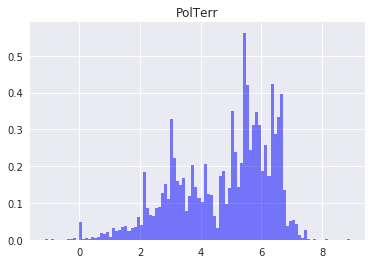

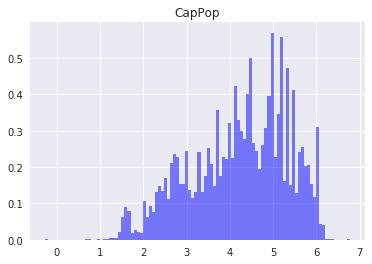

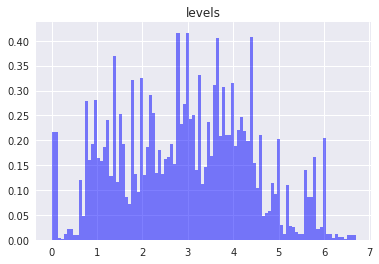

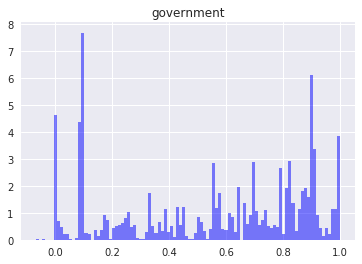

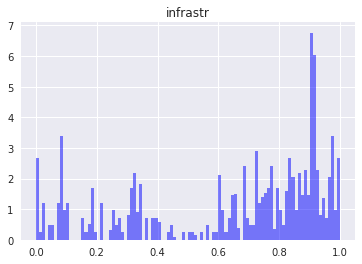

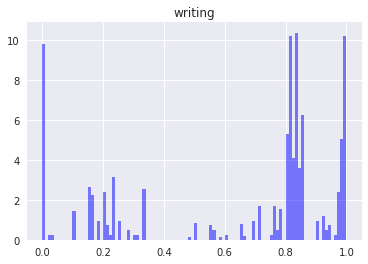

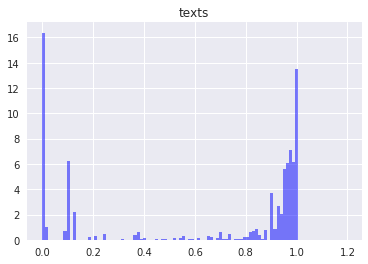

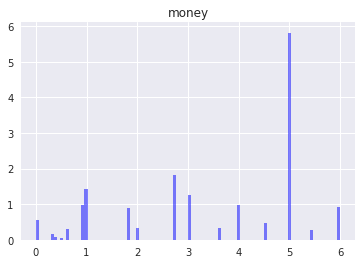

In [29]:
# histogram for each CCs

num_bins = 100

for cc in range(9): 
    n, bins, patches = plt.hist(data_mat[:, cc], num_bins, normed=1, facecolor='blue', alpha=0.5)
    plt.title(features[cc])
    plt.legend()
    plt.show()
    plt.close()